# Back Propagation

## 1. loading of data

In [1]:
import pickle
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# 2. Computational graph

<img src='https://i.imgur.com/seSGbNS.png'>

<pre>
1. if you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]
2. the final output of this graph is a value L which is computed as (Y-Y')^2
</pre>

### Task 1: Implementing backpropagation and Gradient checking


<pre>1. <b>Check this video for better understanding of the computational graphs and back propagation:</b> <a href='https://www.youtube.com/watch?v=i94OvYb6noo#t=1m33s'>https://www.youtube.com/watch?v=i94OvYb6noo</a>
</pre>

<pre>
2. <b>write two functions</b>

#you can modify the definition of this function according to your needs
<font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, ..., W[8] corresponds to w9 in graph.
        # write code to compute the value of L=(y-y')^2
        </font>
        return (L, any other variables which you might need to use for back propagation)
        <font color='grey'>
        # Hint: you can use dict type to store the required intermediate variables 
        </font>
</font>
</pre>

<pre>
# you can modify the definition of this function according to your needs
<font color='blue'>
def backward_propagation(L, Variables):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # Variables: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        </font>
        return dW
        <font color='grey'>
        # here dW can be a list, or dict or any other data type wich will have gradients of all the weights
        # Hint: you can use dict type to store the required variables 
        </font>
</font>
</pre>
3. <b> <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>Gradient checking</a></b>:<a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> 

<pre>we know that the derivative of any function is </pre>$$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$
<pre>
The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of gradient checking!

</pre>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}

to do this task you need to write a function 
<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):
    <font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()
    </font>
    approx_gradients = []
    for each wi weight value in W:
        <font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
        </font>
        approx_gradients.append(approximation gradients of weight wi)
    <font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with      gradient_check formula
    </font>
    return gradient_check
</font>
NOTE: you can do sanity check by checking all the return values of gradient_checking(), they have to be zero. if not you have bug in your code
</pre>

### Task 2: Optimizers

1. As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
2. check this video and blog: https://www.youtube.com/watch?v=gYpoJMlgyXA,  http://cs231n.github.io/neural-networks-3/
3. use the same computational graph that was mentioned above to do this task
4. initilze the 9 weights from normal distribution with mean=0 and std=0.01

5. 

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

6.

<pre>
<b>task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights
<b>task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights
<b>task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights
</pre>



In [47]:
import numpy as np
from matplotlib import pyplot as plt

In [28]:
w=np.random.uniform(low=-4,high=4,size=9)

In [24]:
def sigmoid(x):
    return(1/(1+np.exp(-x)))

def forward(w):
    
    
    #right
    p7=w[2]*f3
    p5=np.sin(p7)
    p6=w[3]*f4+w[4]*f5
    p2=sigmoid((p5*p6)+w[7])
    p1=p2*w[8]
    
    #left
    q6=w[0]*f1+w[1]*f2
    q3=np.exp((q6**2)+w[5])
    q1=np.tanh(q3+w[6])
    l=q1+p1
    
    
    
    return(l,p2,p7,q1,q3,q6,p6)

def retloss(w):
    #right
    p7=w[2]*f3
    p5=np.sin(p7)
    p6=w[3]*f4+w[4]*f5
    p2=sigmoid((p5*p6)+w[7])
    p1=p2*w[8]
    
    #left
    q6=w[0]*f1+w[1]*f2
    q3=np.exp((q6**2)+w[5])
    q1=np.tanh(q3+w[6])
    
    l=q1+p1
    
    return(l)

def backpropagation(p2,p7,q1,q3,q6,p6):
    #backpropright
    dw=np.zeros(9)
    dw[8]=p2
    dw[7]=p2*(1-p2)*w[8]
    dw[2]=dw[7]*f3*np.cos(p7)*p6
    dw[3]=dw[7]*np.sin(p7)*f4
    dw[4]=dw[7]*np.sin(p7)*f5
    
    #backpropleft
    dw[6]=1-np.square(q1)    
    dw[5]=dw[6]*q3
    dw[0]=dw[5]*2*f1*q6
    dw[1]=dw[5]*f2*2*q6
        
    return(dw)
    

In [41]:
def gradient_check(w):


    epsilon=1e-4
    l,p2,p7,q1,q3,q6,p6=forward(w)
    print("loss for datapint index=",i,"is",l)
    g=backpropagation(p2,p7,q1,q3,q6,p6)
    
    dwapprox=[]
    for count,value in enumerate(g):
        wcopy=w.copy()

        wcopy[count]+=epsilon
        term1=retloss(wcopy)
        wcopy=w.copy()

        wcopy[count]-=epsilon
        term2=retloss(wcopy)
        final=(term1-term2)/(2*epsilon)
        dwapprox.append(final)
   

    
    return(dwapprox,g)

In [42]:
i=78 #
f1=X[i,0]
f2=X[i,1]
f3=X[i,2]
f4=X[i,3]
f5=X[i,4]
approx,true=gradient_check(w)

loss for datapint index= 78 is -0.538041749989834


In [43]:
i=1
for g,dwapprox in zip(true,approx):
    num=np.linalg.norm(g-dwapprox)
    din=np.linalg.norm(g)+np.linalg.norm(dwapprox)
    print("gradient check value for w"+str(i),"=",num/din)
    i+=1
    

gradient check value for w1 = 8.174246083104431e-10
gradient check value for w2 = 3.63980675942421e-09
gradient check value for w3 = 1.025229503847887e-11
gradient check value for w4 = 3.3337981575762745e-11
gradient check value for w5 = 4.420475706224892e-12
gradient check value for w6 = 2.549295435615951e-09
gradient check value for w7 = 3.226212939455224e-09
gradient check value for w8 = 3.599715930636974e-11
gradient check value for w9 = 6.462793401488868e-13


## Task 2
#### Task2.1: Ordinary SGD

In [46]:
w=np.random.normal(loc=0,scale=1,size=9)
learning_rate=0.001
plot_loss=[]
for epoch in range(0,100):
    ypred=[]
    for x,y1 in (zip(X,y)):
        
        f1=x[0]
        f2=x[1]
        f3=x[2]
        f4=x[3]
        f5=x[4]
        

        l,p2,p7,q1,q3,q6,p6 = forward(w)
        
        ypred.append(l)
        
        g=backpropagation(p2,p7,q1,q3,q6,p6) 
        w= w + (g*2*(y1-l)*learning_rate)
    
    loss=np.sum(np.square(ypred-y))
    plot_loss.append(loss)
    print("loss after epoch",epoch,"=",loss)

loss after epoch 0 = 630.545672248777
loss after epoch 1 = 426.89081815457394
loss after epoch 2 = 362.7395211181881
loss after epoch 3 = 327.8752613803623
loss after epoch 4 = 301.676389015934
loss after epoch 5 = 277.94667799096516
loss after epoch 6 = 253.8226488094485
loss after epoch 7 = 227.52626388757403
loss after epoch 8 = 197.87187614050663
loss after epoch 9 = 164.4903084497198
loss after epoch 10 = 128.524284750196
loss after epoch 11 = 93.17993407611372
loss after epoch 12 = 62.85056997767697
loss after epoch 13 = 40.60291221125043
loss after epoch 14 = 26.487735525700565
loss after epoch 15 = 18.424872139746206
loss after epoch 16 = 14.037306047863702
loss after epoch 17 = 11.614222653343965
loss after epoch 18 = 10.173406063814515
loss after epoch 19 = 9.216962988402269
loss after epoch 20 = 8.508419858827784
loss after epoch 21 = 7.938053359218055
loss after epoch 22 = 7.454300751963732
loss after epoch 23 = 7.0317065406666925
loss after epoch 24 = 6.6565738074355805
lo

Text(0.5,1,'Loss vs Epoch Plot')

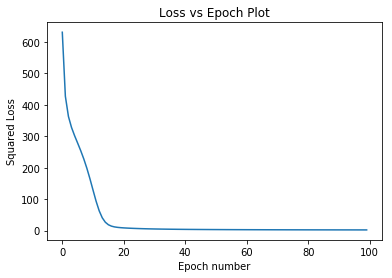

In [50]:
plt.plot(plot_loss)
plt.xlabel("Epoch number")
plt.ylabel("Squared Loss")
plt.title("Loss vs Epoch Plot")

### Observations:
1. vanilla SGD seems to converge as loss increasing with epoch
2. Loss at around 100th epoch is 2.07
3. Loss hasent reached global minima as convergence rate is slow

#### Task 2.2: Momemtum based SGD


In [52]:
w=np.random.normal(loc=0,scale=1,size=9)
learning_rate=0.001
v=0
gamma=0.8
plot_loss=[]
for epoch in range(0,100):
    ypred=[]
    for x,y1 in (zip(X,y)):
        
        f1=x[0]
        f2=x[1]
        f3=x[2]
        f4=x[3]
        f5=x[4]
        

        l,p2,p7,q1,q3,q6,p6 = forward(w)
        
        ypred.append(l)
        
        g=backpropagation(p2,p7,q1,q3,q6,p6)
        
        v=gamma*v+(g*2*(y1-l)*learning_rate)
        w= w + v
    
    loss=np.sum(np.square(ypred-y))
    plot_loss.append(loss)
    print("loss after epoch",epoch,"=",loss)

loss after epoch 0 = 211.5150318966041
loss after epoch 1 = 22.94848918250546
loss after epoch 2 = 11.396808752976437
loss after epoch 3 = 7.421055632851299
loss after epoch 4 = 4.993765631029463
loss after epoch 5 = 3.614673103051535
loss after epoch 6 = 2.817408097725818
loss after epoch 7 = 2.3386757978689645
loss after epoch 8 = 2.038554179795635
loss after epoch 9 = 1.8416756889603376
loss after epoch 10 = 1.7062813376133095
loss after epoch 11 = 1.6085532468544543
loss after epoch 12 = 1.534545743766489
loss after epoch 13 = 1.4759021081001962
loss after epoch 14 = 1.4275091260966597
loss after epoch 15 = 1.3861763140485412
loss after epoch 16 = 1.3498740607369437
loss after epoch 17 = 1.3172851299838446
loss after epoch 18 = 1.2875360291992322
loss after epoch 19 = 1.2600336932518168
loss after epoch 20 = 1.234364879125204
loss after epoch 21 = 1.2102334422171395
loss after epoch 22 = 1.187420782150308
loss after epoch 23 = 1.165760616521464
loss after epoch 24 = 1.1451227040582

Text(0.5,1,'Loss vs Epoch Plot')

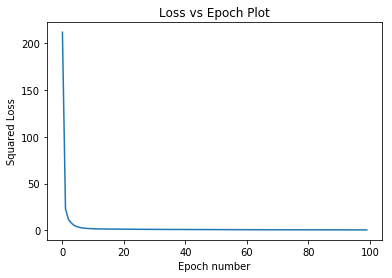

In [53]:
plt.plot(plot_loss)
plt.xlabel("Epoch number")
plt.ylabel("Squared Loss")
plt.title("Loss vs Epoch Plot")

Text(0.5,1,'Loss vs Epoch Plot first 20 epochs')

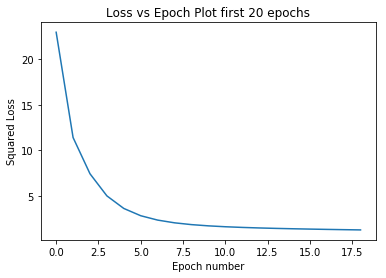

In [58]:
plt.plot(plot_loss[1:20])
plt.xlabel("Epoch number")
plt.ylabel("Squared Loss")
plt.title("Loss vs Epoch Plot first 20 epochs")

### Observation:
1. Momentum based SGD performs better than than ordinary SGD
2. Loss after 100th epoch 0.45
3. Loss has improved compared to SGD but can it go better?? 

#### Task 2.3: Adam

In [59]:
eps=1e-8
beta1 = 0.9
beta2 = 0.999
mt=0
vt=0
plot_loss=[]
w=np.random.normal(loc=0,scale=1,size=9)
learning_rate=0.001

for epoch in range(0,100):
    ypred=[]
    t=1
    for x,y1 in (zip(X,y)):
        
        f1=x[0]
        f2=x[1]
        f3=x[2]
        f4=x[3]
        f5=x[4]
        #print(t)

        l,p2,p7,q1,q3,q6,p6 = forward(w)
        ypred.append(l)
        
        g=backpropagation(p2,p7,q1,q3,q6,p6)
        dx=(g*2*(y1-l))
        
        mt=(beta1*mt)+(1-beta1)*dx
        #if t>1:
        #    mt=mt/(1-(beta1**t))
        
        vt= (beta2*vt)+((dx**2)*(1-beta2))
        #if t>1:
        #    vt=vt/(1-(beta2**t))
        
        w = w + (learning_rate*mt/(np.sqrt(vt)+eps))
        t+=1
    #print(vt)
    loss=np.sum(np.square(ypred-y))
    plot_loss.append(loss)
    print("loss after epoch",epoch,"=",loss)


loss after epoch 0 = 28.1004170430415
loss after epoch 1 = 1.9440187413047219
loss after epoch 2 = 1.2131861145356835
loss after epoch 3 = 0.9379282184564355
loss after epoch 4 = 0.7390967816281582
loss after epoch 5 = 0.5862791269201306
loss after epoch 6 = 0.4740798202638636
loss after epoch 7 = 0.39371345024525767
loss after epoch 8 = 0.3343867755370166
loss after epoch 9 = 0.28682952539045514
loss after epoch 10 = 0.2453690685561924
loss after epoch 11 = 0.20727963392203397
loss after epoch 12 = 0.17106273043155593
loss after epoch 13 = 0.13553024073896794
loss after epoch 14 = 0.09999308149833054
loss after epoch 15 = 0.06537134895889728
loss after epoch 16 = 0.035561594916623425
loss after epoch 17 = 0.015703058089806352
loss after epoch 18 = 0.006318023914250971
loss after epoch 19 = 0.0030494186792327667
loss after epoch 20 = 0.0019994622825391184
loss after epoch 21 = 0.00152850088587263
loss after epoch 22 = 0.0012203204964158349
loss after epoch 23 = 0.000996061570945317
los

Text(0.5,1,'Loss vs Epoch Plot')

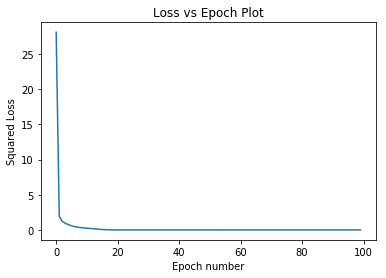

In [60]:
plt.plot(plot_loss)
plt.xlabel("Epoch number")
plt.ylabel("Squared Loss")
plt.title("Loss vs Epoch Plot")

Text(0.5,1,'Loss vs Epoch Plot first 10 epochs')

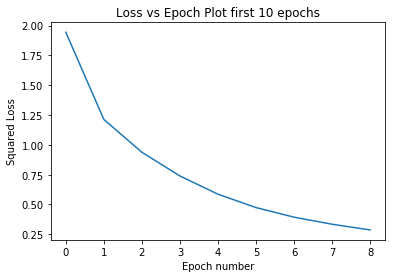

In [64]:
plt.plot(plot_loss[1:10])
plt.xlabel("Epoch number")
plt.ylabel("Squared Loss")
plt.title("Loss vs Epoch Plot first 10 epochs")

### Observation:
1. Adam performs much better than Momentum based SGD
2. Loss after 100th epoch is 2.3e-05
3. Loss is the best among all three algorithms

## Conclusion

#### convergence(Ordinary SGD)< convergence(momentum based SGD)<convergence(Adam)